## Importing file and libraries

In [211]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt #pip install matplotlib
import category_encoders as ce #pip install category_encoders
from sklearn.model_selection import train_test_split #pip install scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
import ipywidgets as widgets #pip install ipywidgets
from IPython.display import display, clear_output #pip install ipython
import warnings 
warnings.filterwarnings('ignore')

In [212]:
df = pd.read_csv('car_detail_en.csv')

In [213]:
df.head()

,ad_id,origin,condition,car_model,mileage,exterior_color,interior_color,num_of_doors,seating_capacity,engine,...,transmission,drive_type,fuel_consumption,describe,brand,grade,year_of_manufacture,car_name,price. price,url
0,17042,Domestic assembly,New car,Truck,0 Km,White,gray,2-door,2-seat,Petrol\t1.0 L,...,Manual,RFD - Rear-wheel drive,L/100Km,Super Carry Truck 5-pound mezzanine is equipp...,Suzuki,Super Carry Truck,2022.0,Suzuki Super Carry Truck 1.0 MT 2022,249 Million,https://bonbanh.com/xe-suzuki-super_carry_truc...
1,53794,Imported,New car,SUV,0 Km,Black,Black,5-door,7-seat,Petrol\t3.4 L,...,Automatic,AWD - 4-wheel drive (AWD),10\tL/100Km,"New Toyota LANDCRUISER 300, imported from Japa...",Toyota,Land Cruiser,2022.0,Toyota Land Cruiser 3.5 V6 2022,4 Billion 286 Million,https://bonbanh.com/xe-toyota-land_cruiser-3.5...
2,73954,Domestic assembly,New car,Crossover,0 Km,Silver,Brown,5-door,8-seat,Petrol\t2.0 L,...,Automatic,RFD - Rear-wheel drive,L/100Km,**Registration fee support worth 15 million VN...,Toyota,Innova,2023.0,Toyota Innova G 2.0 AT 2023 car,885 Million,https://bonbanh.com/xe-toyota-innova-g-2.0-at-...
3,74150,Imported,New car,SUV,0 Km,White,Black,5-door,5-seat,Petrol\t1.8 L,...,Automatic,FWD - Front-wheel drive,L/100Km,"2 interior colors: black, red brown - Car ava...",Toyota,Corolla Cross,2023.0,Toyota Corolla Cross 1.8G 2023,754 Million,https://bonbanh.com/xe-toyota-corolla_cross-1....
4,87573,Domestic assembly,New car,Crossover,0 Km,Silver,gray,5-door,8-seat,Petrol\t2.0 L,...,Automatic,RFD - Rear-wheel drive,L/100Km,Toyota Innova G 100% new Equipped with 2.0 eng...,Toyota,Innova,2022.0,Toyota Innova G 2.0 AT 2022 car,850 Million,https://bonbanh.com/xe-toyota-innova-g-2.0-at-...


In [214]:
df.shape

(30652, 21)

In [215]:
df.isna().sum() # Column 'fuel_system' has too many null values

ad_id                      0
origin                     0
condition                  0
car_model                  0
mileage                    0
exterior_color             0
interior_color             0
num_of_doors               0
seating_capacity           0
engine                     0
fuel_system            23910
transmission               0
drive_type                 0
fuel_consumption           0
describe                   0
brand                      0
grade                      0
year_of_manufacture       32
car_name                   0
price. price               0
url                        0
dtype: int64

In [216]:
df.nunique()

ad_id                  30652
origin                     2
condition                  2
car_model                 10
mileage                 1924
exterior_color            18
interior_color            18
num_of_doors              12
seating_capacity          24
engine                    95
fuel_system              802
transmission               4
drive_type                 6
fuel_consumption          76
describe               28987
brand                     76
grade                    479
year_of_manufacture       34
car_name                5809
price. price            2206
url                    30652
dtype: int64

In [217]:
df.loc[df['fuel_consumption'] == 'L/100Km'].shape # Column 'fuel_consumption' has too many missing values

(19215, 21)

In [218]:
# Remove unused columns
df.drop(columns=['ad_id', 'exterior_color', 'interior_color', 'fuel_system', 'fuel_consumption', 'describe', 'grade', 'car_name', 'url'], inplace=True)

In [219]:
# Remove missing data
df=df.dropna()

In [220]:
df.sample(5)

,origin,condition,car_model,mileage,num_of_doors,seating_capacity,engine,transmission,drive_type,brand,year_of_manufacture,price. price
15514,Domestic assembly,Used car,SUV,"30,000 Km",5-door,5-seat,Petrol\t2.0 L,Automatic,FWD - Front-wheel drive,Mazda,2020.0,770 Million
14357,Imported,Used car,Sedan,"19,000 Km",4-door,5-seat,Petrol\t2.0 L,Automatic,RFD - Rear-wheel drive,BMW,2020.0,Billion 900 Million
29281,Imported,Used car,SUV,"46,000 Km",5-door,7-seat,Petrol,Automatic,FWD - Front-wheel drive,Honda,2019.0,868 Million
21264,Domestic assembly,Used car,SUV,0 Km,5-door,5-seat,Petrol\t2.0 L,Automatic,FWD - Front-wheel drive,Mazda,2020.0,695 Million
9541,Imported,Used car,Bán tải / Pickup,"90,000 Km",4-door,5-seat,Diesel\t2.5 L,Automatic,RFD - Rear-wheel drive,Chevrolet,2018.0,485 Million


## Preprocessing:

- 'car_model': Clean 'Bán tải / Pickup'
- 'mileage': remove ',' and 'Km', convert to int
- 'num_of_doors': remove '-door' and outliers (>7), convert to int
- 'seating_capacity': remove '-seat' and outlier(1), convert to int
- 'engine': split into 'engine_type' and 'engine_capacity' (convert to int)
- 'transmission': remove '-' values
- 'drive_type': remove '-' values
- 'year_of_manufacture': remove '.', convert to int
- 'price. price': rename, convert to int, remove outliers

In [221]:
# Remove 'Bán tải / ' suffix from the 'car_model' column
df['car_model'] = df['car_model'].str.replace('Bán tải / ', '')


In [222]:
# Remove any space, comma and 'Km' suffix from the 'mileage' column
df['mileage'] = df['mileage'].str.replace(' ', '').str.replace(',', '').str.replace('Km', '')

# Convert the 'mileage' column to integer
df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')

# Rename the column to 'mileage_in_km'
df.rename(columns={'mileage': 'mileage_in_km'}, inplace=True)

In [223]:
# Strip spaces, remove '-door' from the 'num_of_doors' column and convert to integer
df['num_of_doors'] = df['num_of_doors'].str.strip().str.replace('-door', '').astype(int)

# Remove unreasonable values
df = df[df['num_of_doors'] <= 7]

In [224]:
# Strip spaces, remove '-seat' from the 'seating_capacity' column and convert to integer
df['seating_capacity'] = df['seating_capacity'].str.strip().str.replace('-seat', '').astype(int)

In [225]:
# Split the 'engine' column into two columns: 'engine_type' and 'engine_capacity_in_litre'
df[['engine_type', 'engine_capacity_in_litre']] = df['engine'].str.split('\t', expand=True)

# Remove the ' L' suffix from the 'engine_capacity_in_litre' column
df['engine_capacity_in_litre'] = df['engine_capacity_in_litre'].str.replace(' L', '')

# Convert 'engine_capacity_in_litre' to float
df['engine_capacity_in_litre'] = df['engine_capacity_in_litre'].astype(float)

In [226]:
# Convert '-' values to nulls
df['transmission'] = np.where(df['transmission'] == '-', np.nan, df['transmission'])

In [227]:
# Remove everything after and including '-' in the 'drive_type' column
df['drive_type'] = df['drive_type'].str.split(' - ').str[0]

# Convert '-' values to nulls
df['drive_type'] = np.where(df['drive_type'] == '-', np.nan, df['drive_type'])

# Replace 'RFD' with 'RWD'
df['drive_type'] = df['drive_type'].replace('RFD', 'RWD')

In [228]:
# Convert 'year_of_manufacture' column to int
df['year_of_manufacture'] = df['year_of_manufacture'].astype(int)

In [229]:
# Rename the column to 'price'
df.rename(columns={'price. price': 'price'}, inplace=True)

# Clean and convert the 'price' column
df['price'] = df['price'].apply(lambda x: re.sub(r'[^\d.]', '', x)).astype(int)
df['price'] = df['price'] * 1e6

In [230]:
df.isnull().sum()

origin                         0
condition                      0
car_model                      0
mileage_in_km                  0
num_of_doors                   0
seating_capacity               0
engine                         0
transmission                  15
drive_type                   107
brand                          0
year_of_manufacture            0
price                          0
engine_type                    0
engine_capacity_in_litre    1356
dtype: int64

In [231]:
# Drop unused column and missing values
df.drop('engine', axis=1, inplace=True)
df.dropna(inplace=True)

In [232]:
df.head()

,origin,condition,car_model,mileage_in_km,num_of_doors,seating_capacity,transmission,drive_type,brand,year_of_manufacture,price,engine_type,engine_capacity_in_litre
0,Domestic assembly,New car,Truck,0,2,2,Manual,RWD,Suzuki,2022,2.490000e+08,Petrol,1.0
1,Imported,New car,SUV,0,5,7,Automatic,AWD,Toyota,2022,4.286000e+09,Petrol,3.4
2,Domestic assembly,New car,Crossover,0,5,8,Automatic,RWD,Toyota,2023,8.850000e+08,Petrol,2.0
3,Imported,New car,SUV,0,5,5,Automatic,FWD,Toyota,2023,7.540000e+08,Petrol,1.8
4,Domestic assembly,New car,Crossover,0,5,8,Automatic,RWD,Toyota,2022,8.500000e+08,Petrol,2.0


In [233]:
df.shape

(29256, 13)

### Remove Outliers

In [234]:
df.describe()

,mileage_in_km,num_of_doors,seating_capacity,year_of_manufacture,price,engine_capacity_in_litre
count,2.925600e+04,29256.000000,29256.000000,29256.000000,2.925600e+04,29256.000000
mean,4.197632e+05,4.533292,5.563748,2017.337298,1.083511e+09,2.046331
std,3.569228e+07,0.566711,1.342304,5.302394,1.814673e+09,0.816242
min,0.000000e+00,1.000000,2.000000,1990.000000,1.000000e+06,0.100000
25%,0.000000e+00,4.000000,5.000000,2015.000000,3.800000e+08,1.500000
50%,2.000000e+04,5.000000,5.000000,2019.000000,5.890000e+08,2.000000
75%,6.000000e+04,5.000000,7.000000,2022.000000,9.190000e+08,2.400000
max,4.294967e+09,7.000000,29.000000,2023.000000,3.999900e+10,12.700000


In [235]:
# Calculate the Z-score for 'price'
df['price_zscore'] = (df['price'] - df['price'].mean()) / df['price'].std()

# Set a threshold for outliers (Z-score > 3 or Z-score < -3)
threshold = 3

# Remove outliers based on the threshold
df = df[abs(df['price_zscore']) <= threshold]

# Drop the 'price_zscore' column
df.drop('price_zscore', axis=1, inplace=True)

In [236]:
# Export file
df_cleaned = df.copy()
#csv_file_path = r'C:\Users\Admin\Desktop\Car Price Prediction\df_cleaned.csv'
#df_cleaned.to_csv(csv_file_path, index=False)

### Encode categorical values

In [237]:
# Assuming df is your DataFrame and 'price' is the target column
columns_to_encode = ['origin', 'condition', 'car_model', 'transmission', 'drive_type', 'brand', 'engine_type']

# Create a copy of the DataFrame with only the columns to encode
df_encoded = df[columns_to_encode].copy()

# Create the RegularizedTargetEncoder object
encoder = ce.TargetEncoder(cols=columns_to_encode, smoothing=0.2)

# Fit and transform the encoder on the selected columns
df_encoded = encoder.fit_transform(df_encoded, df['price'])

# Replace the columns_to_encode in the original DataFrame with the encoded columns
df[columns_to_encode] = df_encoded

In [238]:
df.head()

,origin,condition,car_model,mileage_in_km,num_of_doors,seating_capacity,transmission,drive_type,brand,year_of_manufacture,price,engine_type,engine_capacity_in_litre
0,6.711929e+08,1.114444e+09,3.554286e+08,0,2,2,3.157669e+08,9.981824e+08,3.899574e+08,2022,2.490000e+08,9.078188e+08,1.0
1,1.182562e+09,1.114444e+09,1.224524e+09,0,5,7,9.962457e+08,2.100573e+09,7.746398e+08,2022,4.286000e+09,9.078188e+08,3.4
2,6.711929e+08,1.114444e+09,5.716589e+08,0,5,8,9.962457e+08,9.981824e+08,7.746398e+08,2023,8.850000e+08,9.078188e+08,2.0
3,1.182562e+09,1.114444e+09,1.224524e+09,0,5,5,9.962457e+08,5.357166e+08,7.746398e+08,2023,7.540000e+08,9.078188e+08,1.8
4,6.711929e+08,1.114444e+09,5.716589e+08,0,5,8,9.962457e+08,9.981824e+08,7.746398e+08,2022,8.500000e+08,9.078188e+08,2.0


## Regression

In [239]:
# Split the dataset into features and target variable
X = df.drop(['price'], axis=1)
y = df['price']

### Linear Regression

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [241]:
# Initialize the linear regression model
linear_regression = LinearRegression()

# Train the model
linear_regression.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_regression.predict(X_test)

In [242]:
 # Evaluate the model using loss functions and R-squared
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
 
print("Root Mean Squared Error (RMSE): ", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared score: ", r2)

Root Mean Squared Error (RMSE):  660387413.0166171
Mean Absolute Error (MAE): 377460669.462497
R-squared score:  0.556208587468319


In [243]:
# Assess model generalization ability using k-fold cross-validation

# Perform cross-validation with RMSE as the evaluation metric
rmse_scores = np.sqrt(-cross_val_score(linear_regression, X, y, cv=5, scoring='neg_mean_squared_error'))

# Calculate the mean and standard deviation of the RMSE scores
mean_cv_rmse = np.mean(rmse_scores)
std_cv_rmse = np.std(rmse_scores)

print("Cross-Validation RMSE Scores:")
print(rmse_scores)
print("Mean CV RMSE:", mean_cv_rmse)
print("Standard Deviation of CV RMSE:", std_cv_rmse)

Cross-Validation RMSE Scores:
[8.16950129e+08 6.11325929e+08 5.97858096e+08 6.12849793e+08
 5.86771488e+08]
Mean CV RMSE: 645151086.9176848
Standard Deviation of CV RMSE: 86425957.04237229


### Gradient Boosting

In [244]:
# Initialize and train the GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train, y_train)

# Predict on the test set
y_pred = gbr.predict(X_test)

In [245]:
# Evaluate the model using loss functions and R-squared
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
 
print("Root Mean Squared Error (RMSE): ", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared score: ", r2)

Root Mean Squared Error (RMSE):  454281301.99455804
Mean Absolute Error (MAE): 208831812.8183294
R-squared score:  0.7899943187012304


In [246]:
# Assess model generalization ability using k-fold cross-validation

# Define the RMSE scorer
scorer = make_scorer(mean_squared_error, squared=False)

# Perform cross-validation with RMSE as the evaluation metric
rmse_scores = cross_val_score(gbr, X, y, cv=5, scoring=scorer)

# Calculate the mean and standard deviation of the RMSE scores
mean_cv_rmse = np.mean(rmse_scores)
std_cv_rmse = np.std(rmse_scores)

print("Cross-Validation RMSE Scores:")
print(rmse_scores)
print("Mean CV RMSE:", mean_cv_rmse)
print("Standard Deviation of CV RMSE:", std_cv_rmse)

Cross-Validation RMSE Scores:
[6.02401682e+08 4.25156791e+08 4.05364476e+08 4.03368790e+08
 4.08408559e+08]
Mean CV RMSE: 448940059.40413904
Standard Deviation of CV RMSE: 77116130.83950883


### Random Forest

In [247]:
# Initialize the Random Forest model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
random_forest.fit(X, y)

# Perform predictions
predictions = random_forest.predict(X)

In [248]:
# Evaluate the model using loss functions and R-squared
rmse = mean_squared_error(y, predictions, squared=False)
mae = mean_absolute_error(y, predictions)
r2 = r2_score(y, predictions)

print("Root Mean Squared Error (RMSE): ", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared score: ", r2)

Root Mean Squared Error (RMSE):  254662044.12142408
Mean Absolute Error (MAE): 83594345.14927103
R-squared score:  0.9310075385495699


In [249]:
# Assess model's generalization ability using k-fold cross-validation

# Define the RMSE scorer
cv_scores = cross_val_score(random_forest, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate the RMSE from the MSE scores
rmse_scores = np.sqrt(cv_scores)

# Calculate the mean and standard deviation of the RMSE scores
mean_cv_rmse = rmse_scores.mean()
std_cv_rmse = rmse_scores.std()

print("Cross-Validation RMSE Scores:")
print(rmse_scores)
print("Mean CV RMSE:", mean_cv_rmse)
print("Standard Deviation of CV RMSE:", std_cv_rmse)

Cross-Validation RMSE Scores:
[5.65389788e+08 4.10357811e+08 3.82920230e+08 3.80005969e+08
 4.06904223e+08]
Mean CV RMSE: 429115604.4019784
Standard Deviation of CV RMSE: 69226616.81355006


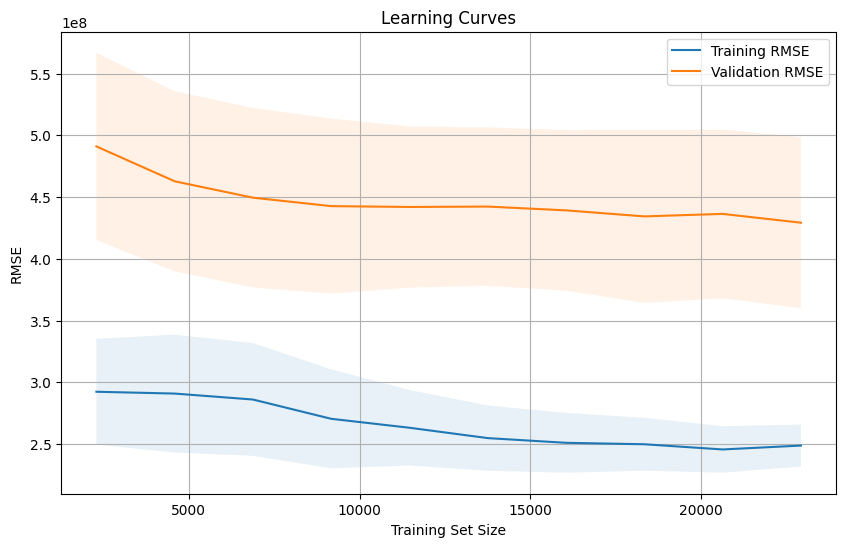

In [250]:
# Assess model's performance as the amount of training data increases using learning curves

# Calculate the learning curves
train_sizes, train_scores, val_scores = learning_curve(random_forest, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

# Convert the negative MSE scores to positive and calculate RMSE
train_scores = np.sqrt(-train_scores)
val_scores = np.sqrt(-val_scores)

# Calculate the mean and standard deviation of the RMSE scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training RMSE')
plt.plot(train_sizes, val_mean, label='Validation RMSE')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.grid(True)
plt.show()

Random Forest algorithm is chosen for having better performance than the other two.

## Prediction

In [251]:
# Define the existing values for categorical features
existing_values = {
    'origin': ['Domestic assembly', 'Imported'],
    'condition': ['New car', 'Used car'],
    'car_model': ['Convertible/Cabriolet', 'Coupe', 'Crossover', 'Hatchback', 'Pickup', 'Sedan', 'SUV', 'Truck', 'Van/Minivan', 'Wagon'],
    'transmission': ['Automatic', 'Manual'],
    'drive_type': ['RWD', 'FWD', '4WD', 'AWD'],
    'brand': ['Acura', 'Audi', 'Baic', 'Bentley', 'BMW', 'Brilliance', 'Buick', 'BYD', 'Cadillac', 'Chery', 'Chevrolet', 'Chrysler', 'Citroen', 'Daewoo', 'Daihatsu', 'Dodge', 'Dongben', 'Ferrari', 'Fiat', 'Ford', 'Gaz', 'Geely', 'Hongqi', 'Honda', 'Hummer', 'Hyundai', 'Infiniti', 'Isuzu', 'Jaguar', 'JRD', 'Jeep', 'Kia', 'LandRover', 'Lexus', 'Lifan', 'Lamborghini', 'Luxgen', 'Maserati', 'Mazda', 'McLaren', 'Mercedes Benz', 'Mekong', 'MG', 'Mini', 'Mitsubishi', 'Nissan', 'Peugeot', 'Pontiac', 'Porsche', 'RAM', 'Renault', 'Rolls Royce', 'Samsung', 'Scion', 'Smart', 'Ssangyong', 'Subaru', 'Suzuki', 'SYM', 'Thaco', 'Tobe', 'Toyota', 'UAZ', 'Volkswagen', 'Volvo', 'VinFast', 'Zotye'],
    'engine_type': ['Petrol', 'Diesel', 'Hybrid', 'Electric']
}

# Create dropdown widgets for categorical features
dropdowns = {
    'origin': widgets.Dropdown(options=existing_values['origin'], description='Origin'),
    'condition': widgets.Dropdown(options=existing_values['condition'], description='Condition'),
    'car_model': widgets.Dropdown(options=existing_values['car_model'], description='Car Model'),
    'transmission': widgets.Dropdown(options=existing_values['transmission'], description='Transmission'),
    'drive_type': widgets.Dropdown(options=existing_values['drive_type'], description='Drive Type'),
    'brand': widgets.Dropdown(options=existing_values['brand'], description='Brand'),
    'engine_type': widgets.Dropdown(options=existing_values['engine_type'], description='Engine Type')
}

# Create input widgets for numerical features
doors_input = widgets.IntText(description='Number of Doors:')
seating_capacity_input = widgets.IntText(description='Seating Capacity:')
engine_capacity_input = widgets.FloatText(description='Engine Capacity (in litre):')
year_input = widgets.IntText(description='Year of Manufacture:')
mileage_input = widgets.IntText(description='Mileage (in km):')

# Create a button widget for prediction
button = widgets.Button(description="Predict Car Price")

# Create a container for input widgets
input_container = widgets.VBox(list(dropdowns.values()) + [engine_capacity_input, doors_input, seating_capacity_input, year_input,
                                                            mileage_input, button])

# Create an output widget for displaying the predicted price
output = widgets.Output()

# Display the container and output widget
display(input_container, output)

# Extend the label space and align labels to the left using CSS style
label_style = "<style>.widget-label { min-width: 150px !important; text-align: left !important; }</style>"
display(widgets.HTML(label_style))

# Create a function to handle button click event
def predict_price(_):
    # Prepare the input data based on the selected dropdown and input values
    input_data = pd.DataFrame({
        'origin': [dropdowns['origin'].value],
        'condition': [dropdowns['condition'].value],
        'car_model': [dropdowns['car_model'].value],
        'mileage_in_km': [mileage_input.value],
        'num_of_doors': [doors_input.value],
        'seating_capacity': [seating_capacity_input.value],
        'transmission': [dropdowns['transmission'].value],
        'drive_type': [dropdowns['drive_type'].value],
        'brand': [dropdowns['brand'].value],
        'year_of_manufacture': [year_input.value],
        'engine_type': [dropdowns['engine_type'].value],
        'engine_capacity_in_litre': [engine_capacity_input.value]
    })
    
    # Iterate through the categorical columns and replace the unencoded values with encoded values
    for column in columns_to_encode:
    # Get the dropdown value for the current column
        dropdown_value = input_data[column].iloc[0]
    # Find the first index of the matching value in 'df_cleaned[column]'
        matching_index = df_cleaned[df_cleaned[column] == dropdown_value].index[0]
    # Retrieve the corresponding encoded value from 'df'
        encoded_value = df[column].iloc[matching_index]
    # Replace the unencoded value with the encoded value
        input_data[column] = encoded_value

    # Make predictions using fitted random forest model
    predictions = random_forest.predict(input_data)
    
    # Clear the previous output
    with output:
        output.clear_output(wait=True)
        # Display the predicted price
        print("Predicted Car Price:", "{:,.0f}".format(predictions[0]), "VND")

# Attach the button click event handler
button.on_click(predict_price)

# PLEASE CHOOSE AND FILL IN ALL OF THE FEATURES TO MAXIMIZE THE ACCURACY OF THE RESULT!

Output()

HTML(value='<style>.widget-label { min-width: 150px !important; text-align: left !important; }</style>')